In [1]:
from sklearn.datasets import load_iris
import pandas as pd



In [2]:
iris=load_iris()
iris



{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [3]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
X=pd.DataFrame(iris['data'],columns=iris['feature_names'])
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
Y=iris['target']
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
#Sepal length=2.1, Sepal Width=3.2, Petal length=1.4, Petal width=1.5?

**Divide the data into training and validation sets**

In [ ]:
# from sklearn.model_selection import train_test_split
# Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.3)


In [8]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=4,random_state=3)

In [9]:
print(X.shape)
print(Y.shape)
print(Xtrain.shape)
print(Xtest.shape)
print(Ytrain.shape)
print(Ytest.shape)

(150, 4)
(150,)
(146, 4)
(4, 4)
(146,)
(4,)


**Train your Model**

In [10]:
from sklearn.neighbors import KNeighborsClassifier
kmodel=KNeighborsClassifier(n_neighbors=10)
#kmodel.fit(X,Y)
kmodel.fit(Xtrain,Ytrain)

KNeighborsClassifier(n_neighbors=10)

**Evaluate the trained model on training data**

In [11]:
#Yp=kmodel.predict(X)
#Yp
Ytrain_p=kmodel.predict(Xtrain)

In [12]:

#(Yp==Y).sum()/len(X)
(Ytrain_p==Ytrain).sum()/len(Xtrain)

0.9794520547945206

In [13]:
#Accuracy
(Yp==Y).sum()/len(X)

NameError: ignored

**Evaluate the model performance on unknown data or validation data**

In [14]:
Ytest_p=kmodel.predict(Xtest)

In [ ]:
(Ytest_p==Ytest).sum()/len(Xtest)

0.9333333333333333

**Make Predictions**

In [15]:
kmodel.predict([[3.2,4.2,4.4,3.5]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([2])

**Tune parameters**

In [16]:
ts_acc=[]
tr_acc=[]
for i in range(1,15):
  km=KNeighborsClassifier(n_neighbors=i)

  km.fit(Xtrain,Ytrain)

  Yp_train=km.predict(Xtrain)

  atr=(Yp_train==Ytrain).sum()/len(Xtrain)
  tr_acc.append(atr)

  Yp_test=km.predict(Xtest)

  ats=(Yp_test==Ytest).sum()/len(Xtest)
  ts_acc.append(ats)


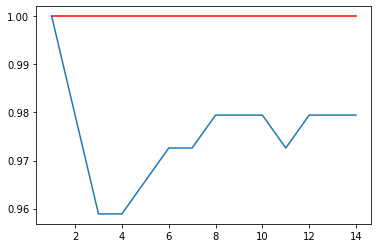

In [17]:
import matplotlib.pyplot as plt
plt.plot(range(1,15),tr_acc)
plt.plot(range(1,15),ts_acc,color='red')
plt.show()